In [1]:
import pandas as pd 
import numpy as np

# import viz libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.size

10692

In [5]:
len(train)

891

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
sns.set_style('whitegrid')

# EXPLORATORY DATA ANALYSIS

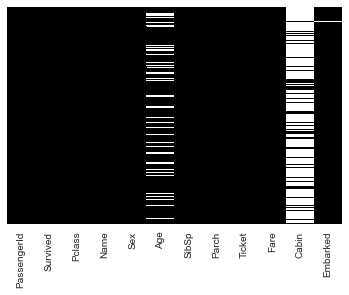

In [12]:
# MISSING DATA: USE SEABORN TO PLOT THE DATA AND SEE WHERE DATA IS MISSING
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='Greys_r')

In [13]:
# there is some data missing in the age column and there is a lot of missing data 
# in the Cabin column so it might be dropped later.

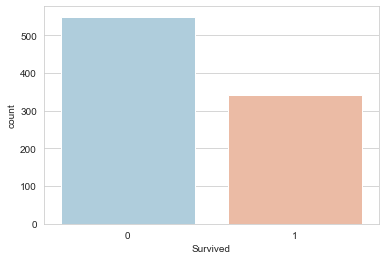

In [14]:
sns.countplot(x='Survived', data=train, palette='RdBu_r')

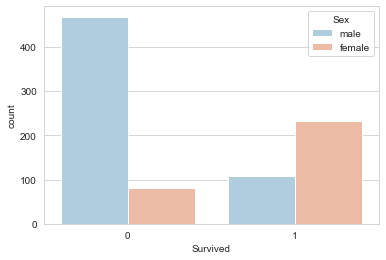

In [15]:
sns.countplot(x="Survived", hue="Sex", data=train, palette="RdBu_r")

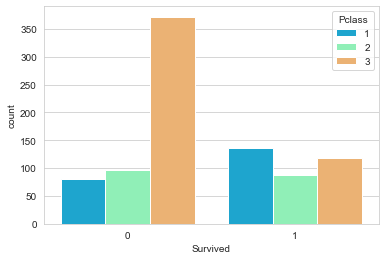

In [16]:
sns.countplot(x="Survived", hue="Pclass", data=train, palette="rainbow")

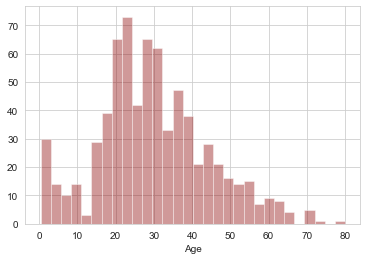

In [17]:
sns.distplot(train['Age'].dropna(), kde=False, color="darkred", bins=30)

In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

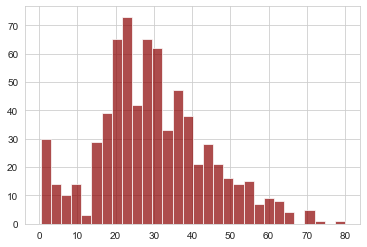

In [20]:
train.Age.hist(bins=30, color='darkred', alpha=0.7)

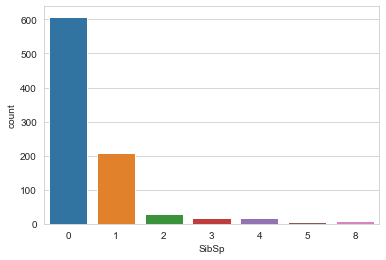

In [21]:
sns.countplot(x="SibSp", data=train)

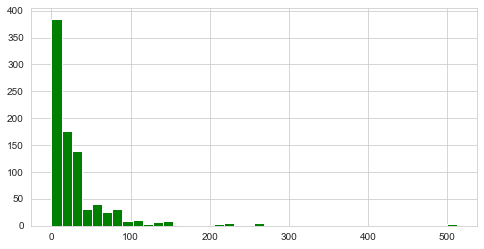

In [22]:
train.Fare.hist(color='green', bins=40, figsize=(8,4))

# CUFFLINKS FOR PLOTS

In [23]:
import cufflinks as cf

In [24]:
cf.go_offline()

In [25]:
train.Fare.iplot(kind='hist', bins=30, color='green')

# DATA CLEANING

In [26]:
# fill missing data instead of dropping the missind age data rows. 
# fill missing age data with the median age
# first check the average age by class

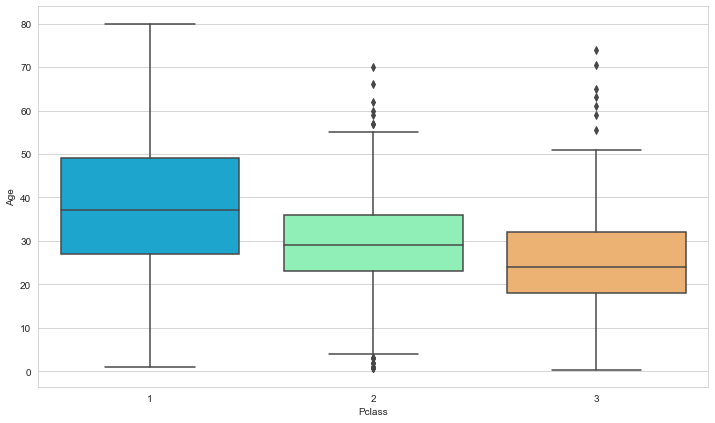

In [29]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Pclass", y="Age", data=train,palette="rainbow")

In [30]:
# use these average values to impute data based on Pclass for Age

In [34]:
# create a function that will take the columns as parameters
def impute_age(cols):
    # take the first column of the input array
    Age = cols[0]
    # tal\ke the second column of the input array
    Pclass = cols[1]

    # check if the age is null
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else: 
            return 24
    else:
        return Age



In [35]:
# apply the function to the Age column and Pclass column
train.Age = train[['Age', 'Pclass']].apply(impute_age, axis=1)

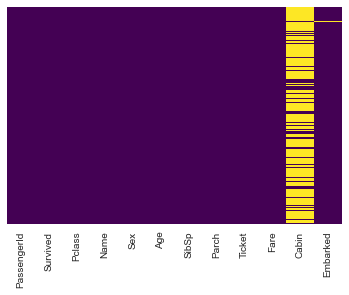

In [36]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [37]:
# drop the Cabin column and the row in Embarked column that is nan

In [38]:
train.drop('Cabin', axis=1, inplace=True)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


In [40]:
train.dropna(inplace=True)

# CONVERTING CATEGORICAL FEATURES TO DUMMIES

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 83.3+ KB


In [42]:
sex = pd.get_dummies(train.Sex, drop_first=True)
embark = pd.get_dummies(train.Embarked, drop_first=True)

In [43]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [44]:
train = pd.concat([train, sex, embark], axis=1)

In [45]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24,1,0,7.2500,1,0,1
1,2,1,1,37,1,0,71.2833,0,0,0
2,3,1,3,24,0,0,7.9250,0,0,1
3,4,1,1,37,1,0,53.1000,0,0,1
4,5,0,3,24,0,0,8.0500,1,0,1


# BUILDING A LOGISTIC REGRESSION MODEL

In [46]:
# SPLIT THE DATA INTO TRAINING AND TEST SETS.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=101)

In [50]:
# TRAINING AND PREDICTING

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [53]:
predictions = logmodel.predict(x_test)

# LET'S EVALUATE OUR MODEL

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

